In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [166]:
data = pd.read_csv("./pison_data_interview.csv", header=None, names=["timestamp","chan0_raw","chan1_raw","chan0_hp","chan1_hp","quat_x","quat_y","quat_z","quat_w","gyro_x","gyro_y","gyro_z","acc_x","acc_y","acc_z","label","rep"])


In [167]:
data.head()

,timestamp,chan0_raw,chan1_raw,chan0_hp,chan1_hp,quat_x,quat_y,quat_z,quat_w,gyro_x,gyro_y,gyro_z,acc_x,acc_y,acc_z,label,rep
0,1514824.503,12535249,12566283,-11889,17295,0.32196,-0.596619,-0.621826,0.392090,-1.342870,1.063105,0.503576,-0.660156,-10.003906,1.21875,0,1
1,1514827.496,12536264,12559246,-2063,13384,0.32196,-0.596741,-0.621826,0.392029,-1.510729,1.175011,0.000000,-0.660156,-10.003906,1.21875,0,1
2,1514830.493,12538584,12565279,2757,16008,0.32196,-0.596741,-0.621765,0.391968,-1.230964,1.175011,-0.279765,-0.660156,-10.003906,1.21875,0,1
3,1514833.500,12546745,12567024,7504,5644,0.32196,-0.596741,-0.621765,0.391968,-1.230964,1.175011,-0.279765,-0.660156,-10.003906,1.21875,0,1
4,1514836.498,12537375,12545467,-3855,-15893,0.32196,-0.596802,-0.621765,0.391907,-1.063105,0.839294,-0.727388,-0.660156,-10.003906,1.21875,0,1


In [168]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14981 entries, 0 to 14980
Data columns (total 17 columns):
timestamp    14981 non-null float64
chan0_raw    14981 non-null int64
chan1_raw    14981 non-null int64
chan0_hp     14981 non-null int64
chan1_hp     14981 non-null int64
quat_x       14981 non-null float64
quat_y       14981 non-null float64
quat_z       14981 non-null float64
quat_w       14981 non-null float64
gyro_x       14981 non-null float64
gyro_y       14981 non-null float64
gyro_z       14981 non-null float64
acc_x        14981 non-null float64
acc_y        14981 non-null float64
acc_z        14981 non-null float64
label        14981 non-null int64
rep          14981 non-null int64
dtypes: float64(11), int64(6)
memory usage: 1.9 MB


,timestamp,chan0_raw,chan1_raw,chan0_hp,chan1_hp,quat_x,quat_y,quat_z,quat_w,gyro_x,gyro_y,gyro_z,acc_x,acc_y,acc_z,label,rep
count,1.498100e+04,1.498100e+04,1.498100e+04,14981.000000,1.498100e+04,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000
mean,1.566353e+06,1.253765e+07,1.251263e+07,62.550898,-2.571735e+02,0.263423,0.051271,0.111606,0.444427,6.407260,5.183960,2.237941,0.564972,-10.547218,2.064593,2.003071,1.991456
std,3.096750e+04,4.158465e+05,5.626673e+05,35397.290087,6.523863e+04,0.320534,0.395624,0.588643,0.335159,119.806613,346.986960,110.392775,7.242565,6.138921,6.852529,1.414352,0.815279
min,1.514825e+06,1.040201e+07,1.021268e+07,-422438.000000,-1.053204e+06,-0.897766,-0.777832,-1.000000,0.000000,-481.754550,-1830.891100,-623.763060,-34.382812,-48.960938,-27.765625,0.000000,1.000000
25%,1.538782e+06,1.245908e+07,1.233564e+07,-9221.000000,-1.041900e+04,0.032471,-0.085632,-0.304993,0.107849,-36.425343,-50.077854,-21.709728,-2.011719,-13.261719,-0.542969,1.000000,1.000000
50%,1.566517e+06,1.256078e+07,1.254805e+07,411.000000,3.980000e+02,0.230042,0.072815,0.036194,0.401611,-0.671435,-0.727388,1.678587,-0.363281,-9.816406,1.457031,2.000000,2.000000
75%,1.594422e+06,1.265877e+07,1.269320e+07,9792.000000,1.127500e+04,0.584961,0.329468,0.712097,0.754333,47.727833,50.413570,39.278942,3.582031,-7.398438,5.097656,3.000000,3.000000
max,1.618179e+06,1.419352e+07,1.504110e+07,640848.000000,1.726175e+06,0.905945,0.738708,1.000000,0.999268,427.312380,1828.317300,425.130220,37.671875,7.691406,33.898438,4.000000,3.000000


In [169]:
data.timestamp = data.timestamp/1000

In [170]:
standing1 = data.index[data['label'] == 0].tolist()
standing2 = data.index[data['label'] == 1].tolist()
walking = data.index[data['label'] == 2].tolist()
walking_fast = data.index[data['label'] == 3].tolist()
running = data.index[data['label'] == 4].tolist()

conditions = [standing1,standing2,walking,walking_fast,running]

In [171]:
#https://stackoverflow.com/questions/44825950/matplotlib-create-two-subplots-in-line-with-two-y-axes-each

def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()
    ax1.scatter(time, data1, color=c1, s=0.05)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('ADC')
    ax2.scatter(time, data2, color=c2, s=0.05)
    ax2.set_ylabel('ADC HP')
    return ax1, ax2



def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)

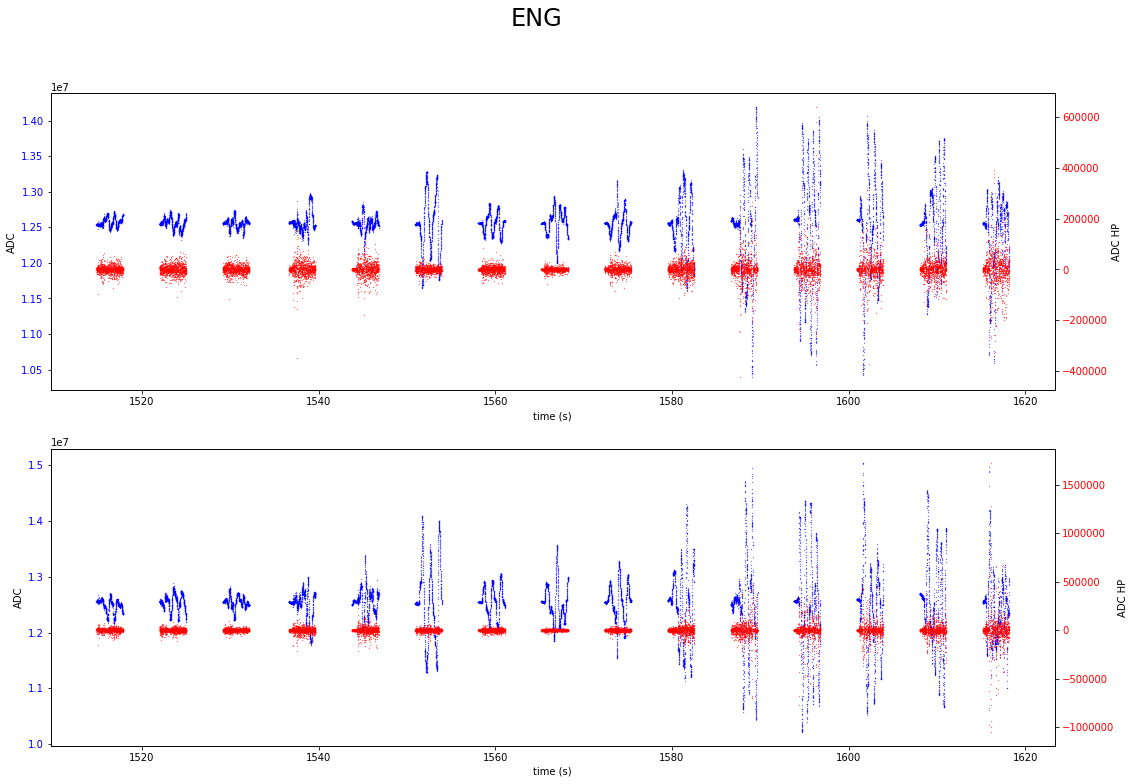

In [172]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(18,12))
ax1, ax1a = two_scales(ax1, data.timestamp, data.chan0_raw, data.chan0_hp, 'b', 'r')
ax2, ax2a = two_scales(ax2, data.timestamp, data.chan1_raw, data.chan1_hp, 'b', 'r')

color_y_axis(ax1, 'b')
color_y_axis(ax1a, 'r')
color_y_axis(ax2, 'b')
color_y_axis(ax2a, 'r')

fig.suptitle('ENG', fontsize=24)
plt.show()

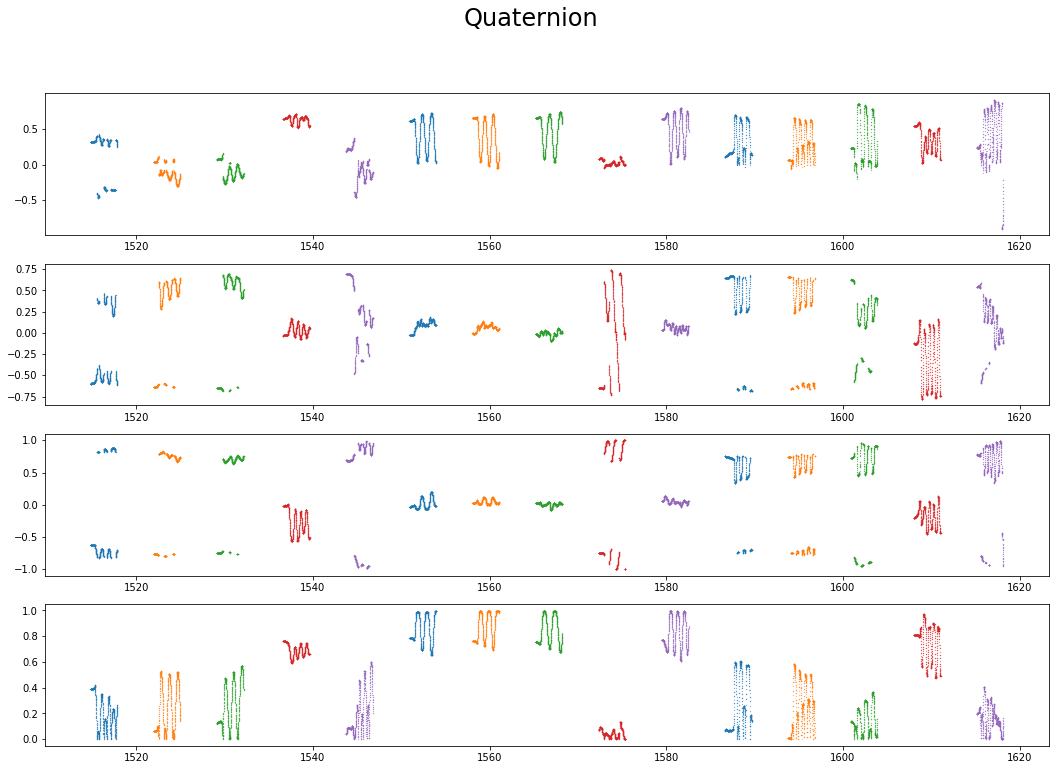

In [173]:
fig, axs = plt.subplots(4, 1, figsize=(18,12))
fig.suptitle('Quaternion', fontsize=24)

for cond in conditions:
    axs[0].scatter(data.iloc[cond].timestamp, data.iloc[cond].quat_x, s=0.05)
    axs[1].scatter(data.iloc[cond].timestamp, data.iloc[cond].quat_y, s=0.05)
    axs[2].scatter(data.iloc[cond].timestamp, data.iloc[cond].quat_z, s=0.05)
    axs[3].scatter(data.iloc[cond].timestamp, data.iloc[cond].quat_w, s=0.05);

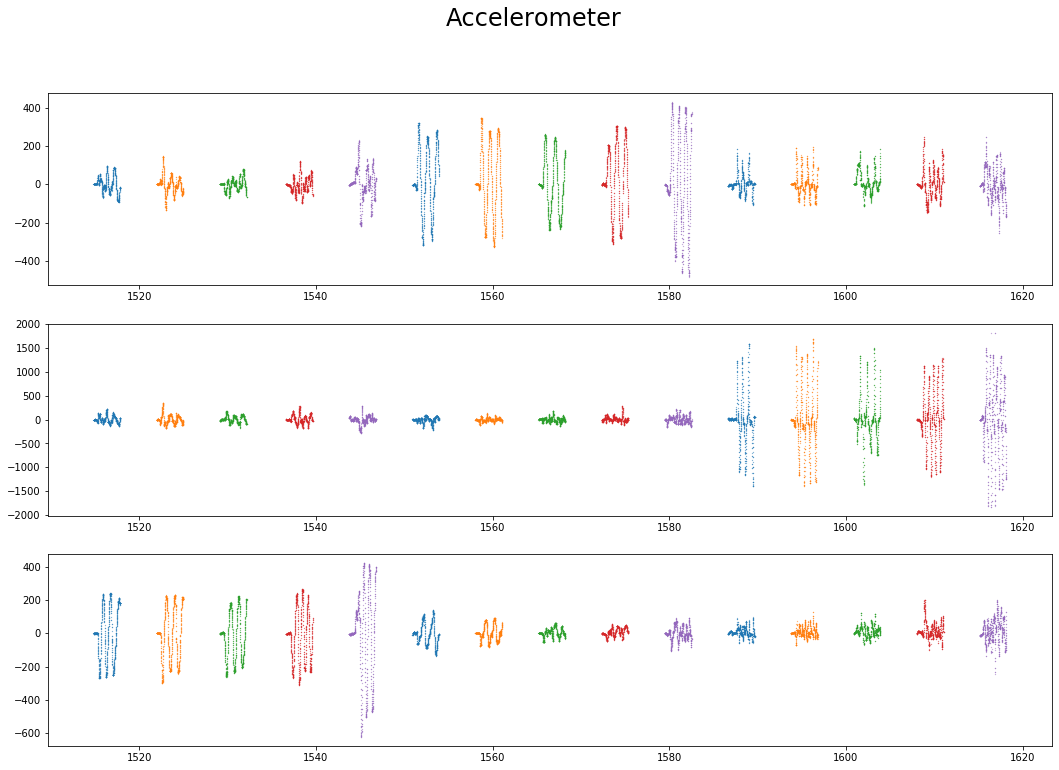

In [174]:
fig, axs = plt.subplots(3, 1, figsize=(18,12))
fig.suptitle('Accelerometer', fontsize=24)

for cond in conditions:
    axs[0].scatter(data.iloc[cond].timestamp, data.iloc[cond].gyro_x, s=0.05)
    axs[1].scatter(data.iloc[cond].timestamp, data.iloc[cond].gyro_y, s=0.05)
    axs[2].scatter(data.iloc[cond].timestamp, data.iloc[cond].gyro_z, s=0.05);

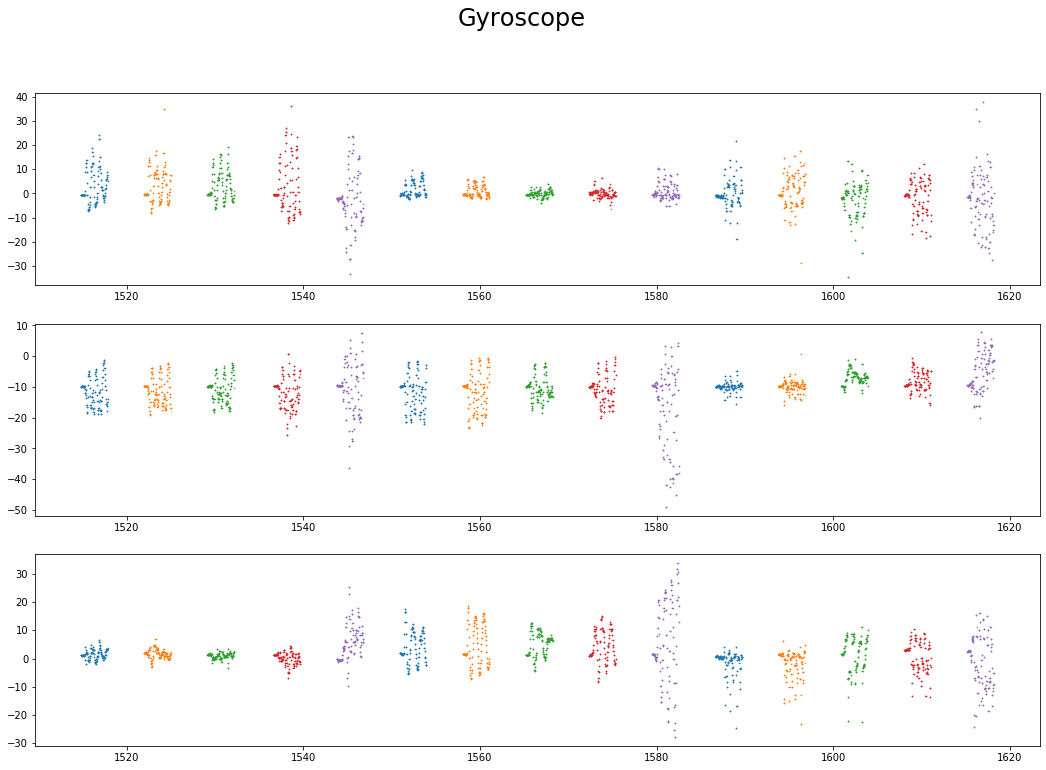

In [175]:
fig, axs = plt.subplots(3, 1, figsize=(18,12))
fig.suptitle('Gyroscope', fontsize=24)

for cond in conditions:
    axs[0].scatter(data.iloc[cond].timestamp, data.iloc[cond].acc_x, s=0.05)
    axs[1].scatter(data.iloc[cond].timestamp, data.iloc[cond].acc_y, s=0.05)
    axs[2].scatter(data.iloc[cond].timestamp, data.iloc[cond].acc_z, s=0.05);